# Import e Configuração

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
# Configura a visualização dos graficos
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

# Leitura dos dados e visualização

In [2]:
arquivos = ['BAC.csv','F.csv','KO.csv','PFE.csv']

In [31]:
# Import e visualização dos dados
dfs = {}
for arquivo in arquivos:
    key = arquivo.replace('.csv','')

    df = pd.read_csv(arquivo)
    df.Date = pd.to_datetime(df.Date)
    dfs[key] = df

    print(f'>> Visualizando dados da ação: {key}')
    print(dfs[arquivo.replace('.csv','')].head())
    print('')

>> Visualizando dados da ação: BAC
        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-11-14  38.090000  38.259998  37.750000  37.759998  36.697521  35541400
1 2022-11-15  38.189999  38.299999  37.299999  37.700001  36.639210  46082800
2 2022-11-16  37.610001  37.740002  37.200001  37.360001  36.308781  23813000
3 2022-11-17  36.880001  37.200001  36.560001  37.169998  36.124119  23689700
4 2022-11-18  37.790001  37.849998  36.919998  37.189999  36.143562  32041800

>> Visualizando dados da ação: F
        Date  Open  High   Low  Close  Adj Close    Volume
0 2018-11-14  9.63  9.67  9.43   9.54   7.670632  46677600
1 2018-11-15  9.50  9.53  9.12   9.31   7.485702  57170100
2 2018-11-16  9.28  9.31  8.98   9.05   7.276650  54582500
3 2018-11-19  9.02  9.36  8.96   9.25   7.437460  56292500
4 2018-11-20  9.10  9.22  9.01   9.06   7.284689  35159900

>> Visualizando dados da ação: KO
        Date       Open       High        Low      Close  Adj Close    Vol

In [22]:
# Import e visualização dos dados
passageiros = pd.read_csv('passageiros.csv')
#passageiros.head()

In [33]:
#passageiros


Timestamp('2018-11-14 00:00:00')

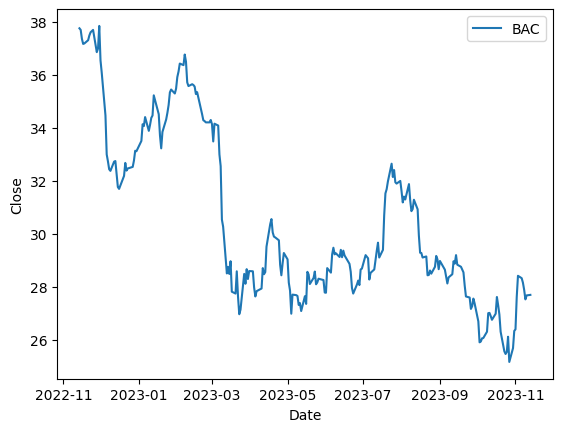

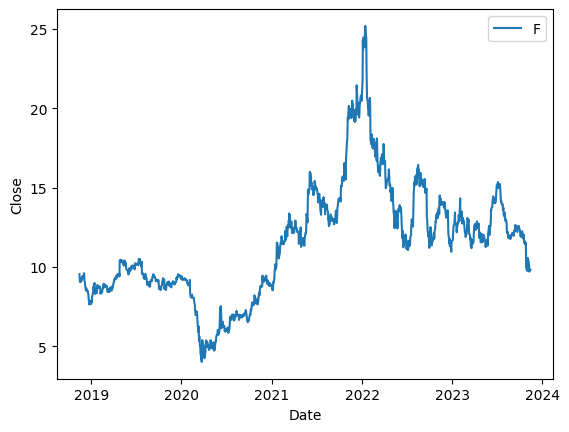

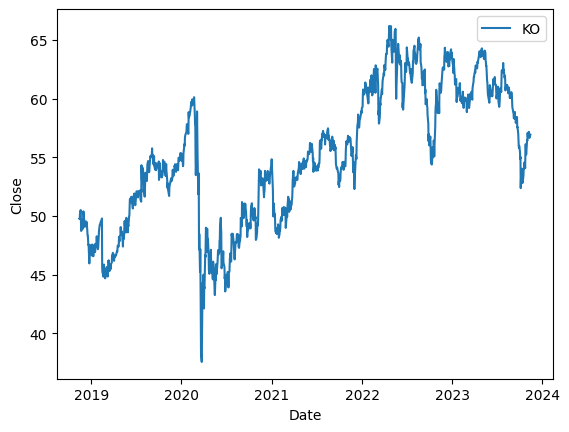

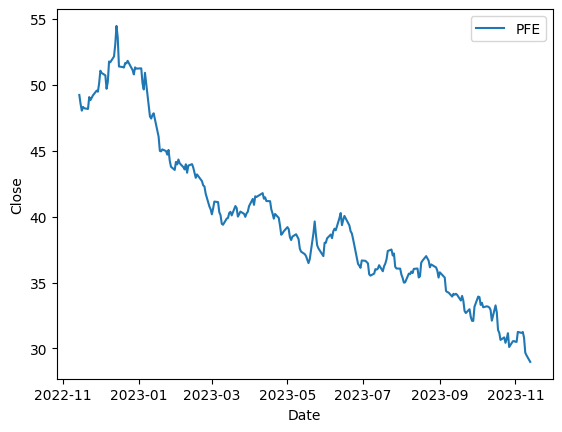

<Figure size 640x480 with 0 Axes>

In [42]:
# Vizualizando grafico de dados
for key in dfs.keys():
    sns.lineplot(x='Date',y='Close',data=dfs[key][['Date', 'Close']], label=key)
    plt.figure()

<Axes: xlabel='tempo', ylabel='passageiros'>

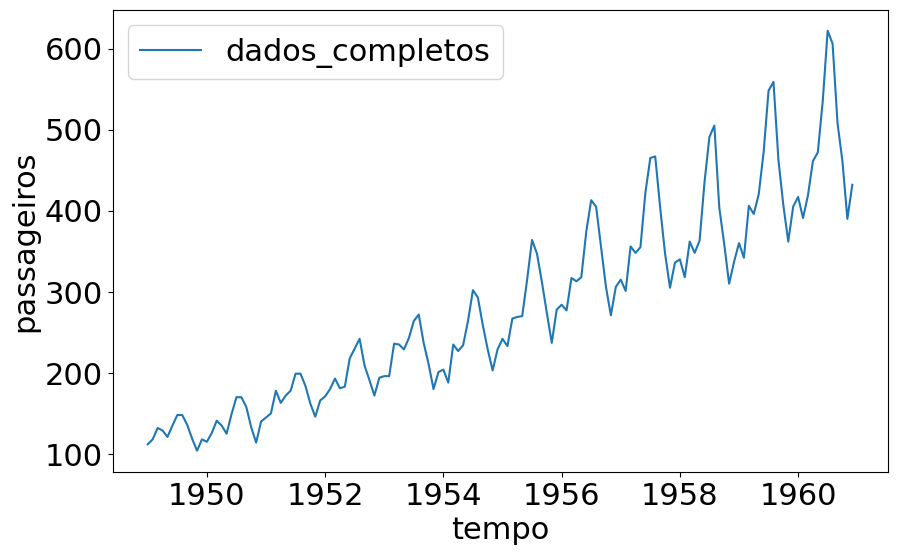

In [ ]:
# Vizualizando grafico de dados
#sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dados_completos')

Pré Processamento

In [ ]:
scs = {}
dados_escalados = {}
xs = {}
ys = {}

for key in dfs.keys():
    df = dfs[key][['Date','Close']]

    #Instancia no modelo os dados
    sc = StandardScaler()

    #Instancia no modelo os dados
    sc.fit(df)
    scs[key] = sc

    #Escala os dados para aplicar ao modelo de IA
    dado_escalado = sc.transform(df)
    dados_escalados[key] = dado_escalado

    #Define X e Y dos dados
    x = dado_escalado[:,0]
    xs[key] = x

    y = dado_escalado[:,1]
    ys[key] = y


In [126]:
#Instancia no modelo os dados
#sc = StandardScaler()

#Instancia no modelo os dados
#sc.fit(passageiros)

#Escala os dados para aplicar ao modelo de IA
#dado_escalado = sc.transform(passageiros)

#Define X e Y dos dados
#x = dado_escalado[:,0]
#y = dado_escalado[:,1]

In [127]:
#Retira os dados de treino e teste
#tamanho_treino = int(len(passageiros)*0.9)
#tamanho_teste = len(passageiros) - tamanho_treino

#xtreino = x[0:tamanho_treino]
#ytreino = y[0:tamanho_treino]

#xteste = x[tamanho_treino:len(passageiros)]
#yteste = y[tamanho_treino:len(passageiros)]

In [ ]:
tamanhos_treinos = {}
tamanhos_testes = {}
xtreinos = {}
ytreinos = {}
xtestes = {}
ytestes = {}

for key in dfs.keys():
    df = dfs[key][['Date','Close']]

    tamanho_treino = int(len(df)*0.9)
    tamanho_teste = len(df) - tamanho_treino

    xtreino = xs[key][0:tamanho_treino]
    ytreino = ys[key][0:tamanho_treino]

    xteste = xs[key][tamanho_treino:len(df)]
    yteste = ys[key][tamanho_treino:len(df)]

    tamanhos_treinos[key] = tamanho_treino
    tamanhos_testes[key] = tamanho_teste
    xtreinos[key] = xtreino
    ytreinos[key] = ytreino
    xtestes[key] = xteste
    ytestes[key] = yteste

In [ ]:
#Visualiza dados de treino e teste
for key in dfs.keys():
    sns.lineplot(x=xtreinos[key],y=ytreinos[key],label='Treino')
    sns.lineplot(x=xtestes[key],y=ytestes[key],label='Teste')
    plt.xlabel(key)
    plt.ylabel('Data')

Text(0, 0.5, 'Data')

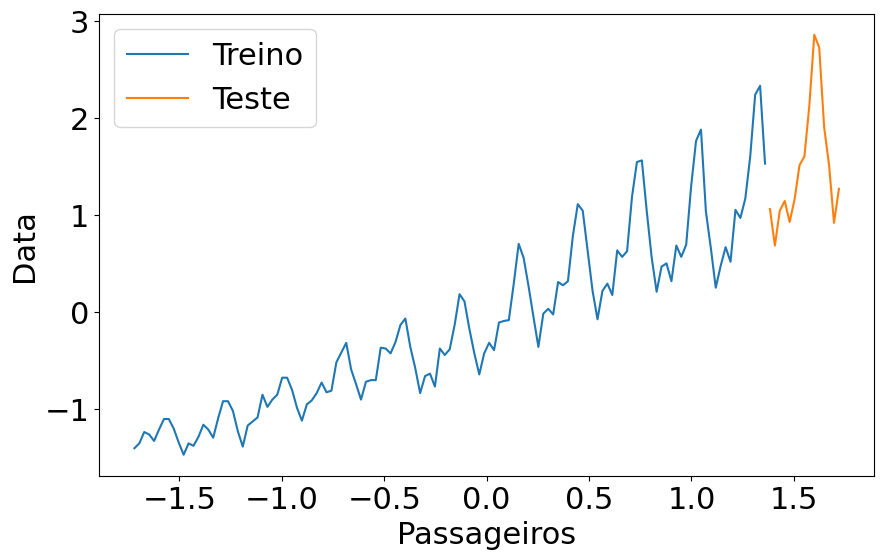

In [128]:
#Visualiza dados de treino e teste
#sns.lineplot(x=xtreino,y=ytreino,label='Treino')
#sns.lineplot(x=xteste,y=yteste,label='Teste')
#plt.xlabel('Passageiros')
#plt.ylabel('Data')

# Função Sigmod
### 3 Camadas

In [148]:
#Separação dos dados para predição do futuro

def separa_dados(vetor,n_passos):
  X_novo,Y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    Y_novo.append(vetor.loc[i])
  X_novo, Y_novo = np.array(X_novo), np.array(Y_novo)

  return X_novo, Y_novo

vetor = pd.DataFrame(ytreino)[0]
xtreino_novo,ytreino_novo = separa_dados(vetor,1)

vetor2 = pd.DataFrame(yteste)[0]
xteste_novo,yteste_novo = separa_dados(vetor2,1)

In [141]:
def treina_modelo(params, input, xtreino, ytreino, epoch):

  regressor = Sequential()
  # Faz a ativação linear (Wx+b):   o primeiro parametro é a quantidade de camadas
  #                                 input_dim diz que a regressão terá apenas uma entrada
  #                                 kernel_initializer diz que o W começara apenas como 1
  #                                 use_bias informa que terá o b como parametro da regressão
  #                                 activation é a função de ativação da rede neural

  #Adiciona ao modelo as camdas
  index = 1
  for camada, kernel, activador in params:
    if index == 1:
      regressor.add(Dense(camada,input_dim=input,kernel_initializer=kernel,activation=activador,use_bias=False))
    else:
      regressor.add(Dense(camada,kernel_initializer=kernel,activation=activador,use_bias=False))
    index = index + 1

  # Parametriza o modelo, modelo de perda a ser minimizado e optimizer é o otimizador (ele é responsavel pela atualização dos pesos)
  regressor.compile(loss='mean_squared_error', optimizer='adam')

  #Treino da rede
  regressor.fit(xtreino,ytreino,epochs=epoch)

  return regressor


#Camadas dos modelos (camadas, Kernel_initializer, activation)
#params = [
#          (8 ,'one'           ,'sigmoid'),
#          (64,'random_uniform','sigmoid'),
#          (1 ,'random_uniform','linear' )
#         ]
params = [
         (8 ,'one'           ,'relu'),
         (64,'random_uniform','relu'),
         (1 ,'random_uniform','linear' )
        ]

regressor = treina_modelo(params, 1, xtreino_novo, ytreino_novo, 200)


Epoch 1/200
4/4 [==============================] - 1s 8ms/step - loss: 0.7836
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.7701
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7653
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7636
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.7573
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.7531
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.7475
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.7429
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7385
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7337
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7279
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7229
Epoch 13/200
4/4 [==============================] - 0s 7ms/st

In [149]:
#Predição do modelo
ypredict_novo = regressor.predict(xtreino_novo)
ypredict_teste_novo = regressor.predict(xteste_novo)

1/1 [==============================] - 0s 22ms/step


<Axes: xlabel='tempo', ylabel='0'>

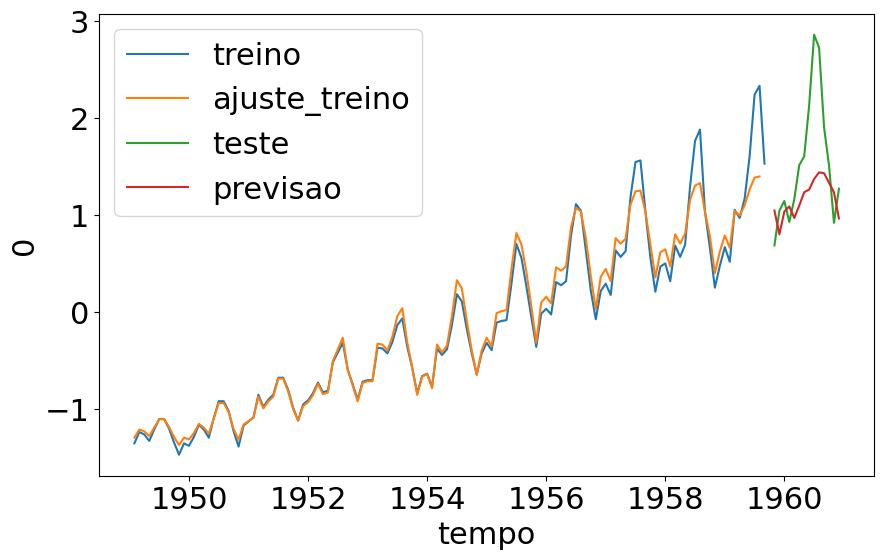

In [143]:
#Plotagem do resultado
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(ypredict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=pd.DataFrame(ypredict_teste_novo)[0].values, data=passageiros[130:144], label='previsao')

Usando janela de 4 times

In [150]:
xTreino_novo, yTreino_novo = separa_dados(vetor,4)
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [152]:
params = [
          (8 ,'one'           ,'linear'),
          (64,'random_uniform','sigmoid'),
          (1 ,'random_uniform','linear' )
         ]

regressor4 = treina_modelo(params, 4, xTreino_novo, yTreino_novo, 300)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 0.7002
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6343
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5741
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5116
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4515
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3902
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3351
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2783
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2364
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2021
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1704
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1559
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [153]:
#Predição
y_predict_novo = regressor4.predict(xTreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)

resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

1/1 [==============================] - 0s 36ms/step


<Axes: xlabel='tempo'>

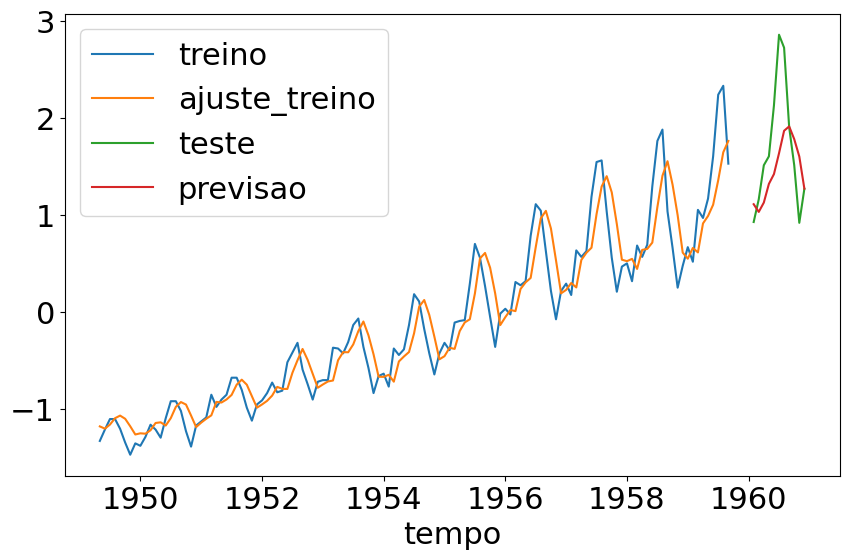

In [154]:
sns.lineplot(x='tempo', y=yTreino_novo,data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values,data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo,data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values,data=passageiros[133:144], label='previsao')